In [1]:
import sys
sys.path.append('../../ML/')

import os
model_folder_path = f'./models'
if not os.path.isdir(model_folder_path):
    os.mkdir(model_folder_path)

# Preprocessing

In [2]:
import pandas as pd
from preprocessing import clean, readData

years = [2018+x for x in range(5)]
location = '臺中'
df = readData(years, location=location)
df = clean(df) # clean df, e.g., nan handling, rename columns, ...
df

,EggPrice,DuckEggPrice,NumRuChung,NumOfChickLayingEggs,BoxesOfEggsPerDay,NumDisuse,NumMoulting,WhiteChickQuantity,RedChickQuantity,ImportChickenQuantity,Corn,SoyBeanFlour,CornFlour,DehulledBeanFlour,HighProteinBeanFlour,AirTemperatureMean,AirTemperatureMax,Precipitation
Date,,,,,,,,,,,,,,,,,,
2018-01-01,24.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.65,13.3,13.21,17.3,27.2,0.0
2018-01-02,24.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.65,13.3,13.21,17.3,27.2,0.0
2018-01-03,26.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.65,13.3,13.21,17.3,27.2,0.0
2018-01-04,26.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.63,13.3,13.21,17.3,27.2,4.0
2018-01-05,26.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.63,13.3,13.20,17.3,27.2,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,40.5,43.0,1592549.0,35037318.0,122636.0,1203140.0,990135.0,387890,83670,0.0,10.85,19.90,11.60,21.1,21.00,17.8,28.1,0.0
2022-12-28,40.5,43.0,1592549.0,35037318.0,122636.0,1203140.0,990135.0,387890,83670,0.0,11.05,19.90,11.68,21.1,21.00,17.8,28.1,0.0
2022-12-29,40.5,43.0,1592549.0,35037318.0,122636.0,1203140.0,990135.0,353700,91500,0.0,11.05,19.90,11.78,21.1,21.00,17.8,28.1,0.0


# Feature Selection

Number of selected features: 7 

Highly relative feature list:
DuckEggPrice            0.726912
NumRuChung              0.435494
Corn                    0.592012
SoyBeanFlour            0.635711
CornFlour               0.620423
DehulledBeanFlour       0.547041
HighProteinBeanFlour    0.639172
Name: EggPrice, dtype: float64


,DuckEggPrice,NumRuChung,Corn,SoyBeanFlour,CornFlour,DehulledBeanFlour,HighProteinBeanFlour,EggPrice
Date,,,,,,,,
2018-01-01,34.0,1160830.0,6.10,12.15,6.65,13.3,13.21,24.5
2018-01-02,34.0,1160830.0,6.10,12.15,6.65,13.3,13.21,24.5
2018-01-03,34.0,1160830.0,6.10,12.15,6.65,13.3,13.21,26.5
2018-01-04,34.0,1160830.0,6.10,12.15,6.63,13.3,13.21,26.5
2018-01-05,34.0,1160830.0,6.10,12.15,6.63,13.3,13.20,26.5
...,...,...,...,...,...,...,...,...
2022-12-27,43.0,1592549.0,10.85,19.90,11.60,21.1,21.00,40.5
2022-12-28,43.0,1592549.0,11.05,19.90,11.68,21.1,21.00,40.5
2022-12-29,43.0,1592549.0,11.05,19.90,11.78,21.1,21.00,40.5


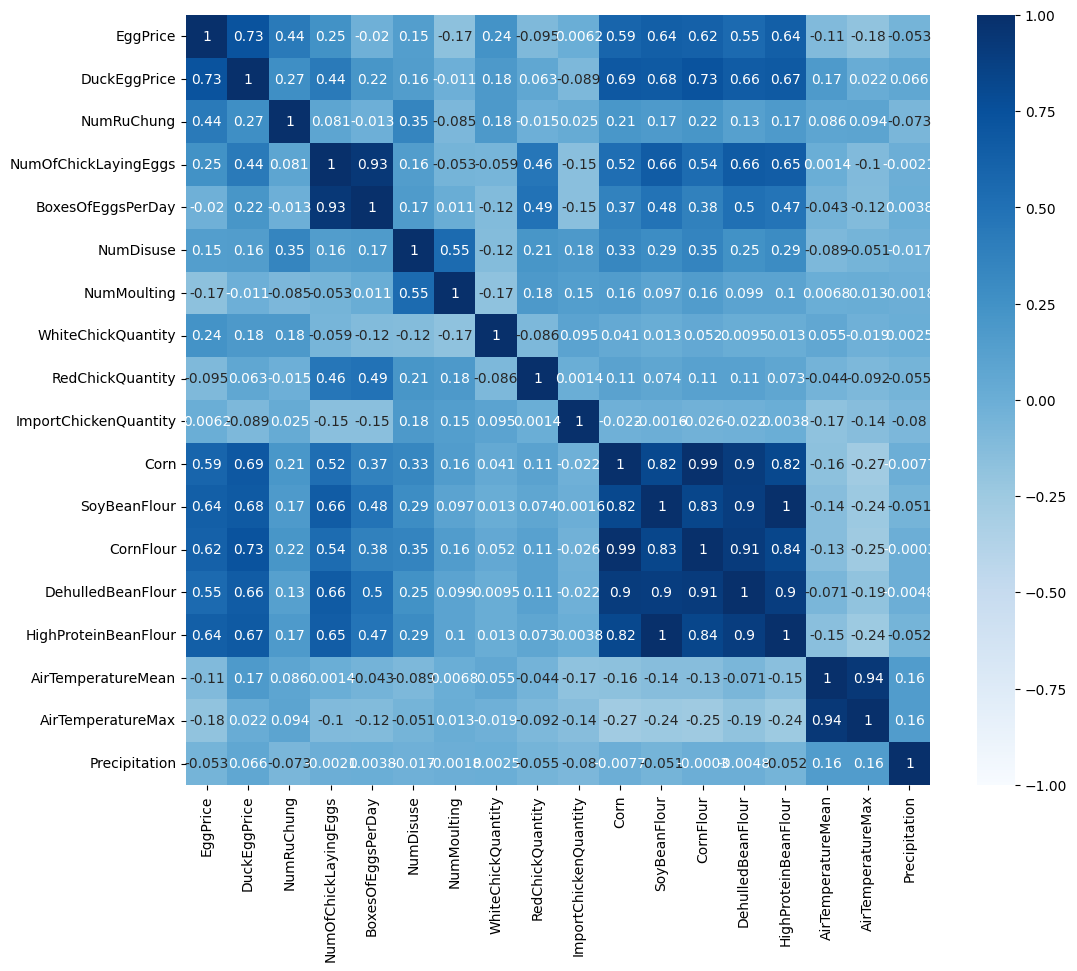

In [3]:
from preprocessing import feature_selection

df = feature_selection(df, type='corr')
df

# Train and test by many conditions

/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-12-10 15:49:13,125] A new study created in memory with name: no-name-1b7539ef-7d81-4548-8301-773f5d2d4f75



 ================================== Year used for prediction: 2018 ================================== 


 #################### 2018-RandomForestRegressor #################### 

Mean Squared Error: 14.874994156582055
Root Mean Squared Error: 3.8568113975902496
Mean Squared Percentage Error: 2.3203736256401393%


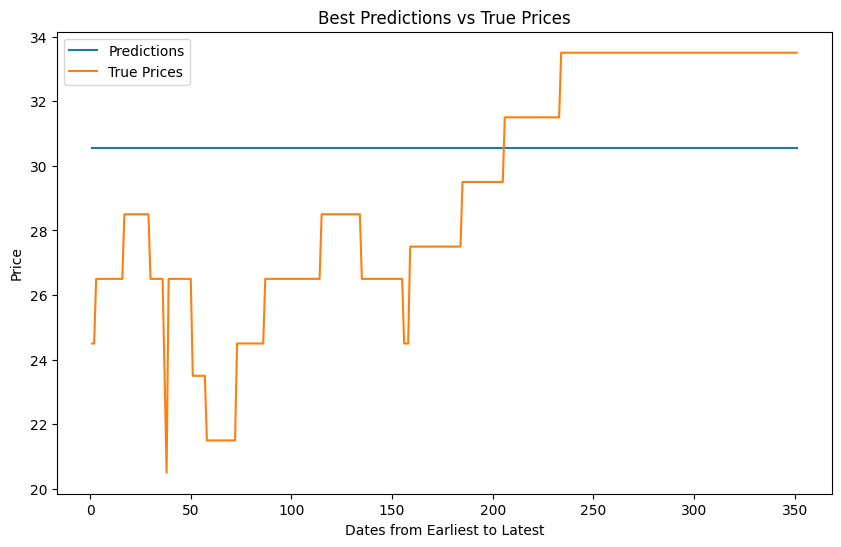


 #################### 2018-AdaBoostRegressor #################### 

Mean Squared Error: 17.511280393570782
Root Mean Squared Error: 4.184648180381569
Mean Squared Percentage Error: 1.8279781456325046%


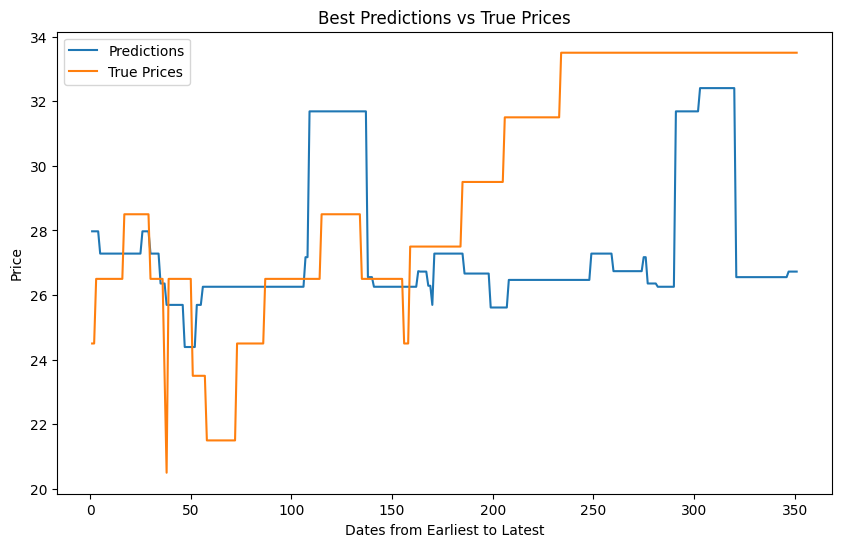


 #################### 2018-XgBoostRegressor #################### 

Mean Squared Error: 12.565928128120499
Root Mean Squared Error: 3.544845289729934
Mean Squared Percentage Error: 1.694851494608406%


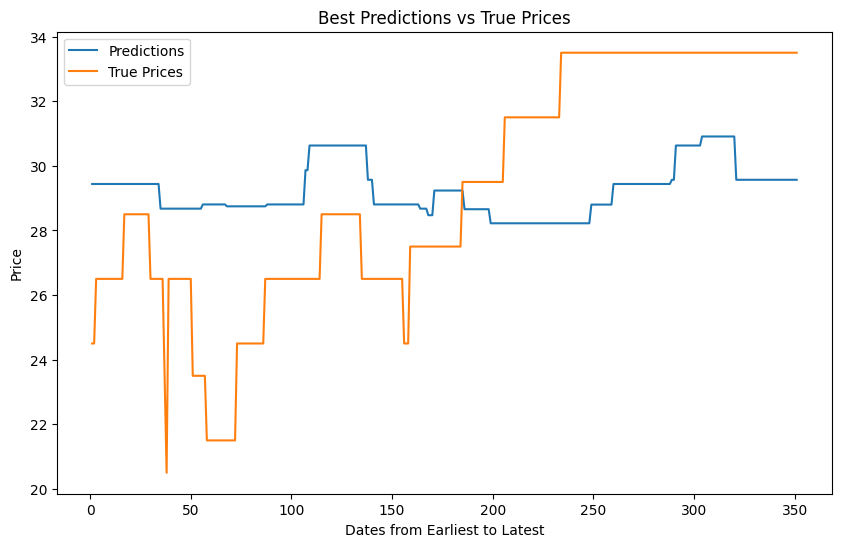

,Model,MSE,RMSE,MSPE
0,RandomForestRegressor,14.874994,3.856811,2.320374
1,AdaBoostRegressor,17.511280,4.184648,1.827978
2,XgBoostRegressor,12.565928,3.544845,1.694851



 ================================== Year used for prediction: 2019 ================================== 


 #################### 2019-RandomForestRegressor #################### 

Mean Squared Error: 18.98915822073255
Root Mean Squared Error: 4.357655128705408
Mean Squared Percentage Error: 2.2307899089143324%


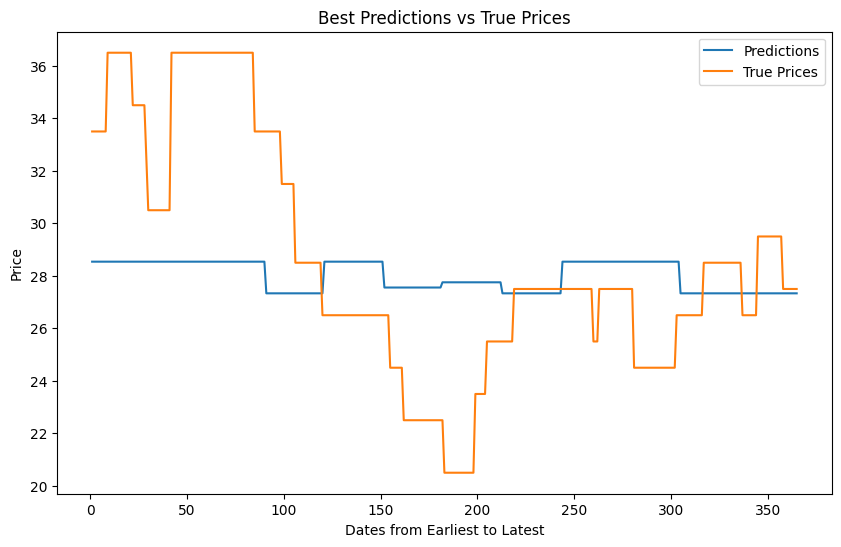


 #################### 2019-AdaBoostRegressor #################### 

Mean Squared Error: 20.27160952739748
Root Mean Squared Error: 4.502400418376566
Mean Squared Percentage Error: 2.670395620218111%


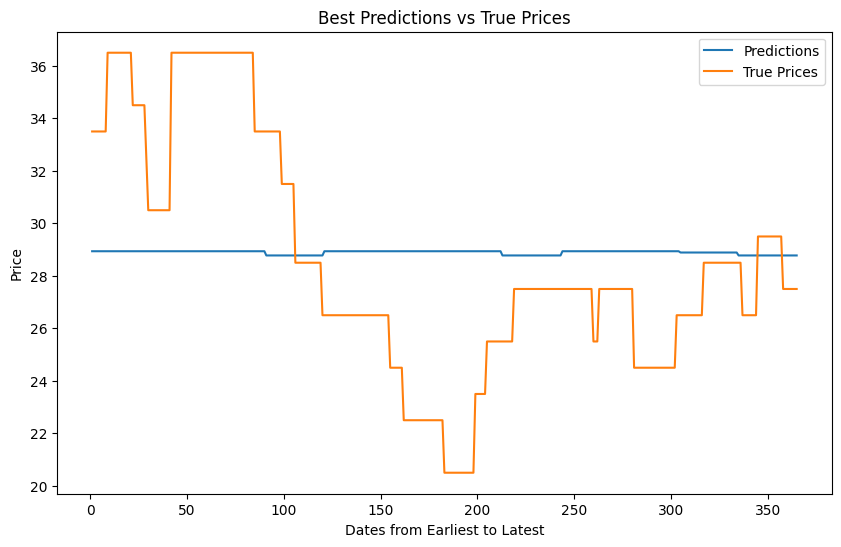


 #################### 2019-XgBoostRegressor #################### 

Mean Squared Error: 20.56408829160947
Root Mean Squared Error: 4.53476441412445
Mean Squared Percentage Error: 2.859968038567214%


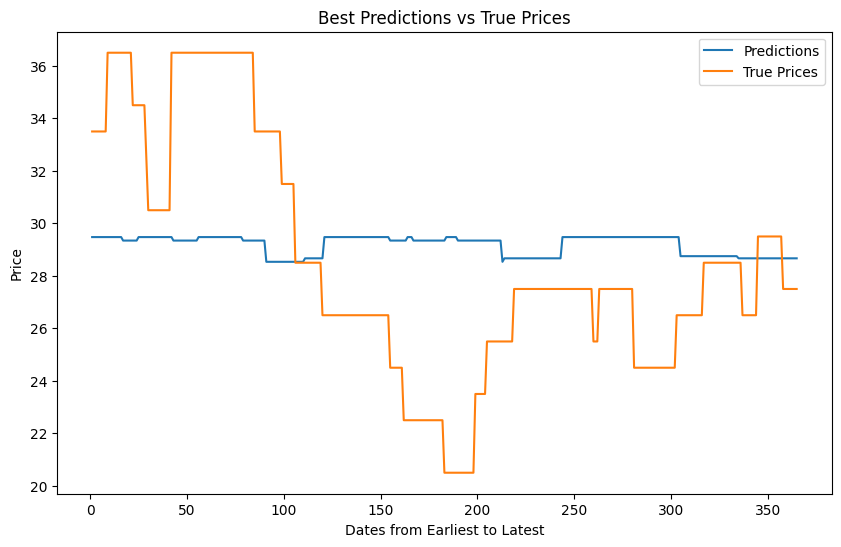

,Model,MSE,RMSE,MSPE
0,RandomForestRegressor,18.989158,4.357655,2.230790
1,AdaBoostRegressor,20.271610,4.502400,2.670396
2,XgBoostRegressor,20.564088,4.534764,2.859968



 ================================== Year used for prediction: 2020 ================================== 


 #################### 2020-RandomForestRegressor #################### 

Mean Squared Error: 10.25930597562695
Root Mean Squared Error: 3.203015138213828
Mean Squared Percentage Error: 1.9245654456984969%


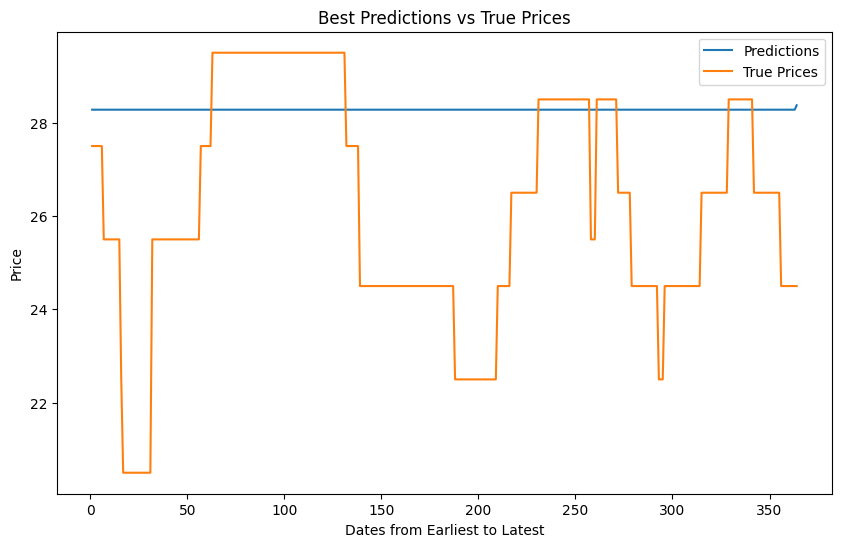


 #################### 2020-AdaBoostRegressor #################### 

Mean Squared Error: 10.67758707864161
Root Mean Squared Error: 3.267657735847133
Mean Squared Percentage Error: 1.8053630161390541%


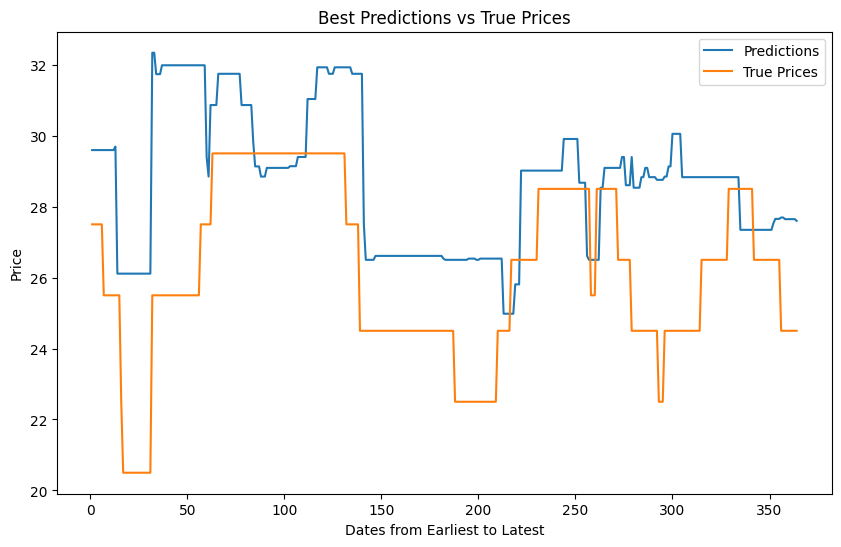


 #################### 2020-XgBoostRegressor #################### 

Mean Squared Error: 8.156595904320886
Root Mean Squared Error: 2.8559754733402185
Mean Squared Percentage Error: 1.5225726139023164%


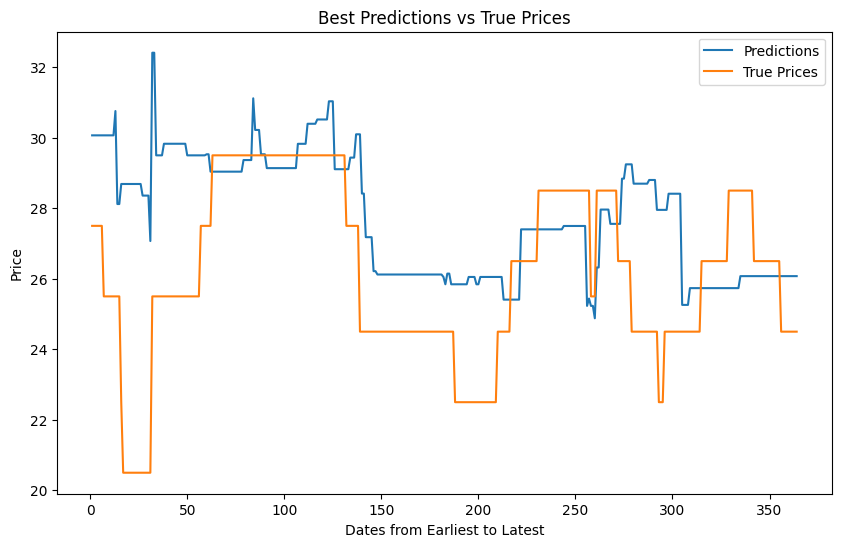

,Model,MSE,RMSE,MSPE
0,RandomForestRegressor,10.259306,3.203015,1.924565
1,AdaBoostRegressor,10.677587,3.267658,1.805363
2,XgBoostRegressor,8.156596,2.855975,1.522573



 ================================== Year used for prediction: 2021 ================================== 


 #################### 2021-RandomForestRegressor #################### 

Mean Squared Error: 19.299192882725116
Root Mean Squared Error: 4.3930846660091944
Mean Squared Percentage Error: 3.1150691336366276%


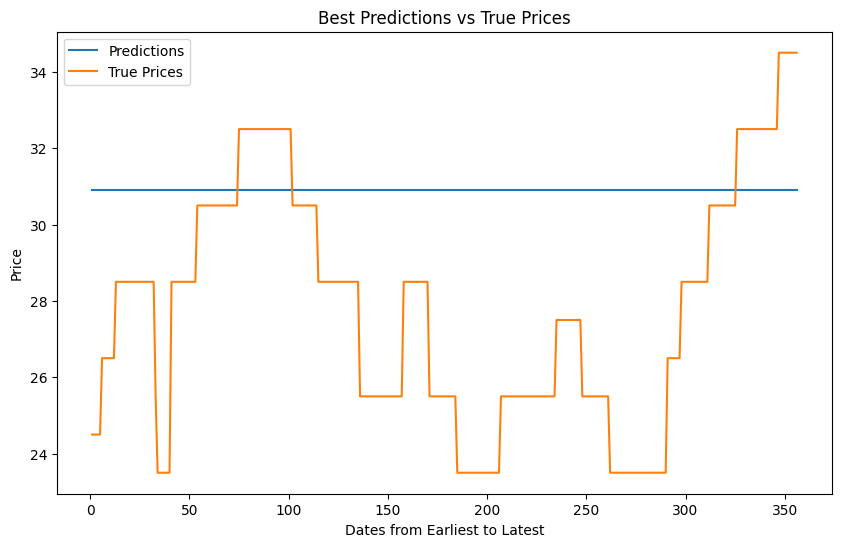


 #################### 2021-AdaBoostRegressor #################### 

Mean Squared Error: 20.27895733768995
Root Mean Squared Error: 4.50321633254388
Mean Squared Percentage Error: 3.152454710290864%


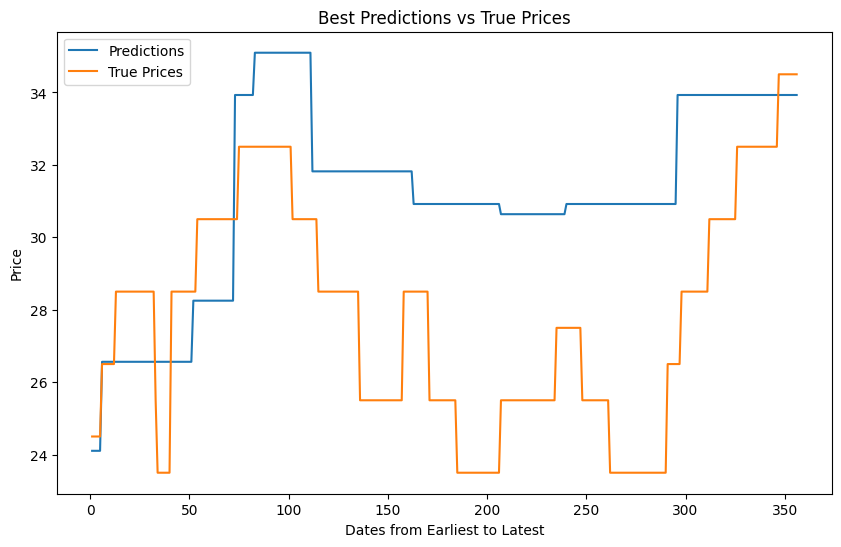


 #################### 2021-XgBoostRegressor #################### 

Mean Squared Error: 29.675166816053963
Root Mean Squared Error: 5.447491791279172
Mean Squared Percentage Error: 4.737974711371838%


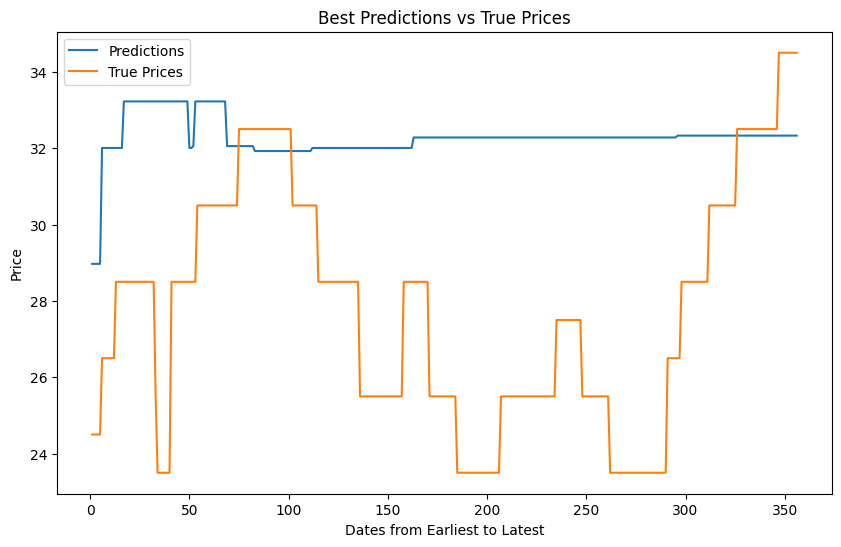

,Model,MSE,RMSE,MSPE
0,RandomForestRegressor,19.299193,4.393085,3.115069
1,AdaBoostRegressor,20.278957,4.503216,3.152455
2,XgBoostRegressor,29.675167,5.447492,4.737975



 ================================== Year used for prediction: 2022 ================================== 


 #################### 2022-RandomForestRegressor #################### 

Mean Squared Error: 86.67695391873467
Root Mean Squared Error: 9.310045860184292
Mean Squared Percentage Error: 5.224984528529069%


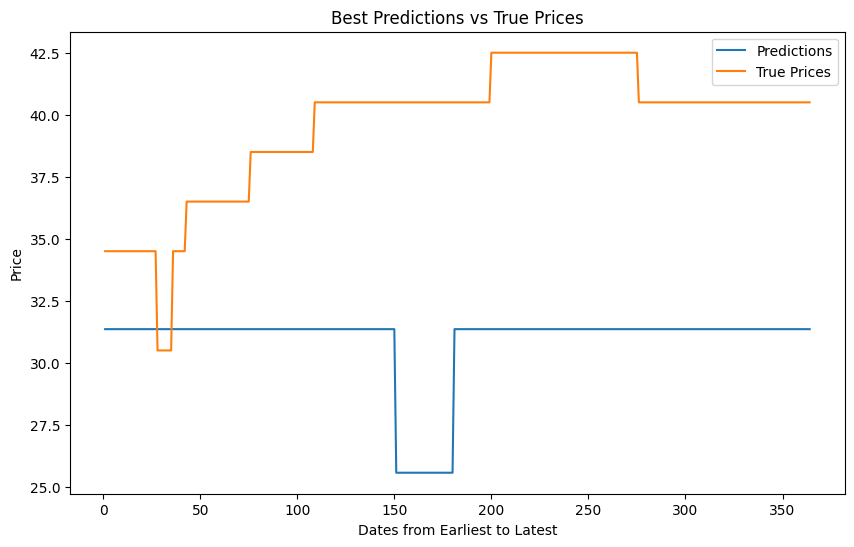


 #################### 2022-AdaBoostRegressor #################### 

Mean Squared Error: 83.80717638287226
Root Mean Squared Error: 9.154625955377547
Mean Squared Percentage Error: 5.048655687626862%


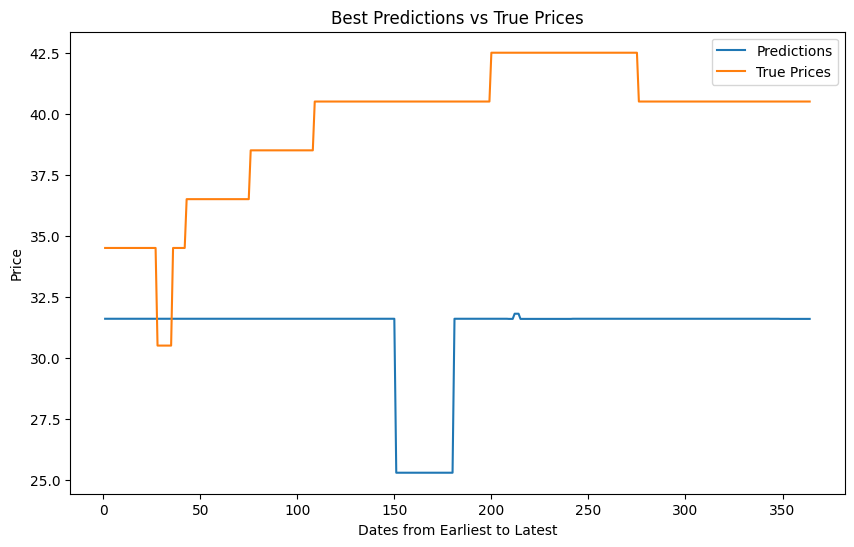


 #################### 2022-XgBoostRegressor #################### 

Mean Squared Error: 69.22327530183316
Root Mean Squared Error: 8.320052602107342
Mean Squared Percentage Error: 4.1140422476887615%


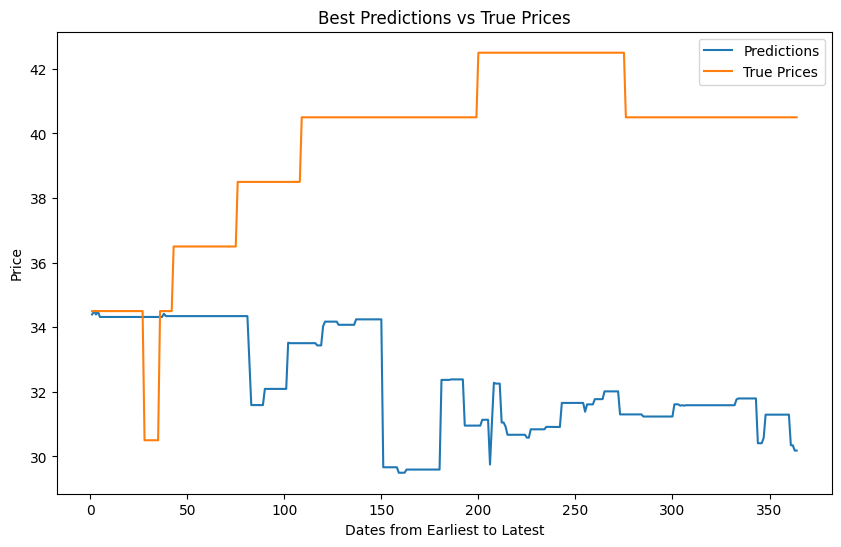

,Model,MSE,RMSE,MSPE
0,RandomForestRegressor,86.676954,9.310046,5.224985
1,AdaBoostRegressor,83.807176,9.154626,5.048656
2,XgBoostRegressor,69.223275,8.320053,4.114042


In [4]:
import joblib
import optuna
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from preprocessing import split_and_scale
from training import train, evaluate, save_model

def train_and_evaluate(model, X_train, y_train):
    model_trained = train(model, X_train, y_train)
    mse, rmse, mspe = evaluate(model_trained, X_test, y_test)
    return rmse  # You can choose to minimize or maximize this metric based on your needs

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    rf_regressor = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    return train_and_evaluate(rf_regressor, X_train, y_train)

def objective_adaboost(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)

    adaboost_regressor = AdaBoostRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )

    return train_and_evaluate(adaboost_regressor, X_train, y_train)

def objective_xgboost(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)

    xgboost_regressor = XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        random_state=42
    )

    return train_and_evaluate(xgboost_regressor, X_train, y_train)

for year in years:
    model_year_folder_path = f'{model_folder_path}/{year}'
    if not os.path.isdir(model_year_folder_path):
        os.mkdir(model_year_folder_path)

    print(f"\n ================================== Year used for prediction: {year} ================================== \n")
    X_train, X_test, y_train, y_test = split_and_scale(df, year_to_predict=year)

    # Random Forest regressor
    study_rf = optuna.create_study(direction='minimize')
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study_rf.optimize(objective_rf, n_trials=50)
    best_params_rf = study_rf.best_params

    rf_regressor = RandomForestRegressor(random_state=42, **best_params_rf)
    rf_regressor_trained = train(rf_regressor, X_train, y_train)
    save_model(year, rf_regressor_trained, "RandomForestRegressor")

    # AdaBoost regressor
    study_adaboost = optuna.create_study(direction='minimize')
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study_adaboost.optimize(objective_adaboost, n_trials=50)
    best_params_adaboost = study_adaboost.best_params

    adaboost_regressor = AdaBoostRegressor(random_state=42, **best_params_adaboost)
    adaboost_regressor_trained = train(adaboost_regressor, X_train, y_train)
    save_model(year, adaboost_regressor_trained, "AdaBoostRegressor")

    # XgbBoost regressor
    study_xgboost = optuna.create_study(direction='minimize')
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study_xgboost.optimize(objective_xgboost, n_trials=50)
    best_params_xgboost = study_xgboost.best_params

    xgboost_regressor = XGBRegressor(random_state=42, **best_params_xgboost)
    xgboost_regressor_trained = train(xgboost_regressor, X_train, y_train)
    save_model(year, xgboost_regressor_trained, "XgBoostRegressor")


    # Create a list of models and their names
    models = [
        {'name':"RandomForestRegressor", 'model':rf_regressor_trained},
        {'name':"AdaBoostRegressor", 'model':adaboost_regressor_trained},
        {'name':"XgBoostRegressor", 'model':xgboost_regressor_trained},
        # Add other models as needed
    ]

    # Loop through each model, train, evaluate, and store the results in the DataFrame
    results_list = []
    # important_features = set(df.columns)
    for model in models:
        print(f"\n #################### {year}-{model['name']} #################### \n")
        model_to_eval = joblib.load(f"{model_year_folder_path}/{model['name']}.joblib")
        mse, rmse, mspe = evaluate(model_to_eval, X_test, y_test, show_best=True)

        # features = df.columns.drop('EggPrice')
        # f_i = list(zip(features,model_to_eval.feature_importances_))
        # f_i.sort(key = lambda x : x[1])
        # plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
        # plt.show()

        results_list.append({"Model": model['name'], "MSE": mse, "RMSE": rmse, "MSPE": mspe})

        # # selection top n features of this model result and find common ones among all models
        # topn = 10
        # topn_feat_val = f_i[-topn:]
        # print(topn_feat_val)
        # topn_feat = []
        # for feat, val in topn_feat_val:
        #     if val > 0.000001:
        #         topn_feat.append(feat)
        
        # important_features = set(topn_feat) & important_features

    # Print or save the DataFrame
    # print(f"Important features among all models: {important_features}")
    results_df = pd.DataFrame(results_list)
    display(results_df)

